In [1]:
import gensim
from gensim.models import Word2Vec
import os
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

In [2]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
import bokeh
output_notebook()

Loading BokehJS ...

In [3]:
arquivoWord2vec = os.path.join("modelos", 'word2vec_100.model')
word2vec = gensim.models.Word2Vec.load(arquivoWord2vec)

C:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
C:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### Selecionando subconjunto de termos-chave

In [4]:
termos_chave = ['lula', 'acaua', 'albacora', 'aratu', 'carapanauba', 'carapeba', 
                'cherne', 'enchova', 'espada', 'furado', 'jubarte', 
               'linguado', 'malhado', 'namorado', 'pirauna', 'ubarana',
               'marlim', 'viola', 'voador', 'xareu']

termos_proximos = []

# montando lista contendo conjunto dos termos-chave e seus respectivos vizinhos mais próximos
for termo_chave in termos_chave:
    termos_proximos.append(termo_chave)
    for termo_proximo in word2vec.most_similar(termo_chave):
        termos_proximos.append(termo_proximo[0])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # This is added back by InteractiveShellApp.init_path()


In [5]:
print(termos_proximos)
print(len(termos_proximos))

['lula', 'sapinhoa', 'jubarte', 'bauna', 'peregrino', 'lldrjs', 'mexilhao', 'iara', 'merluza', 'brsarjs', 'llrjs', 'acaua', 'angico', 'tabuiaia', 'seriema', 'limoeiro', 'livramento', 'cidreira', 'marambaia', 'aquidauana', 'cioba', 'garcas', 'albacora', 'roncador', 'pampo', 'jubarte', 'enchova', 'barracuda', 'badejo', 'anequim', 'marimba', 'pargo', 'trilha', 'aratu', 'buracica', 'jiquia', 'cassarongongo', 'itaparica', 'bimbarra', 'maruim', 'barremiano', 'forquilha', 'vila', 'agba', 'carapanauba', 'araracanga', 'abalone', 'pajeu', 'japiim', 'alagoinhas', 'benevides', 'mandacaru', 'jaraguari', 'cioba', 'icara', 'carapeba', 'pargo', 'linguado', 'cherne', 'garoupinha', 'anequim', 'marimba', 'badejo', 'namorado', 'enchova', 'apiuna', 'cherne', 'linguado', 'anequim', 'badejo', 'corvina', 'bicudo', 'enchova', 'pampo', 'pargo', 'bagre', 'trilha', 'enchova', 'badejo', 'pampo', 'corvina', 'pargo', 'linguado', 'pirauna', 'caioba', 'cherne', 'bicudo', 'barracuda', 'espada', 'xareu', 'curima', 'atum

In [6]:
# Eliminando duplicidades
termos_proximos_sem_duplicidade = sorted(set(termos_proximos))
print(termos_proximos_sem_duplicidade)
print(len(termos_proximos_sem_duplicidade))

['abalone', 'acaua', 'agba', 'alagoinhas', 'albacora', 'anequim', 'angico', 'apiuna', 'aquidauana', 'araracanga', 'aratu', 'argonauta', 'atum', 'badejo', 'bagre', 'barracuda', 'barremiano', 'bauna', 'benevides', 'bicudo', 'bimbarra', 'brsarjs', 'buracica', 'cachalote', 'caioba', 'camorim', 'carapanauba', 'carapeba', 'carmopolis', 'cassarongongo', 'cherne', 'cidreira', 'cioba', 'congro', 'corvina', 'curima', 'enchova', 'espada', 'espadarte', 'fields', 'forquilha', 'furado', 'garcas', 'garoupa', 'garoupinha', 'guaricema', 'iara', 'icara', 'itaparica', 'japiim', 'jaraguari', 'jiquia', 'jubarte', 'limoeiro', 'linguado', 'livramento', 'lldrjs', 'llrjs', 'lula', 'macau', 'malhado', 'mandacaru', 'marambaia', 'marimba', 'marlim', 'maruim', 'merluza', 'mexilhao', 'miranga', 'moreia', 'namorado', 'pajeu', 'paleocanyon', 'pampo', 'parati', 'pargo', 'peregrino', 'pescada', 'pilar', 'pirambu', 'piranema', 'pirauna', 'polvo', 'robalo', 'roncador', 'salema', 'salgo', 'sapinhoa', 'seriema', 'tabuiaia'

In [7]:
termos_proximos = termos_proximos_sem_duplicidade

In [8]:
%%time
# preparando estrutura de dados para rodar tSNE
vetores = list()
for word in termos_proximos:
    vetores.append(word2vec.wv.word_vec(word));

matrix = np.vstack(vetores)  
print(matrix.shape)


tsne = TSNE(n_components=2, random_state=0, perplexity=4,early_exaggeration=4 )
embed_tsne = tsne.fit_transform(vetores)

(100, 100)
Wall time: 688 ms


In [10]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Projeção tSNE para termos de campos de petróleo",
           plot_width=1080, 
           plot_height=900)

# Associando cada indice de cluster a uma cor, para exibicao no grafico
colormap = ['red', 'darkolivegreen', 'steelblue', 'brown', 'black']
#colors = [colormap[x] for x in clids]
#print(colors)

source = ColumnDataSource(data=dict(x1=embed_tsne[:,0],
                                    x2=embed_tsne[:,1],
                                    names=termos_proximos))
                                    #,fill_color = colors))


p.circle(x="x1", y="x2", size=8, source=source, fill_alpha=0.4)

#p.scatter(x="x1", y="x2", size=8, source=source)


#p.circle(x=embed_tsne[:,0], y=embed_tsne[:,1], size=8, fill_alpha=0.4, color = colors)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="10pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)

In [11]:
#clusterizando com KMeans

from sklearn.cluster import KMeans  
import sklearn.cluster
kmeans  = KMeans(n_clusters=5, random_state=10)
clids = kmeans.fit_predict(embed_tsne)
#print(clids)

In [12]:
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  

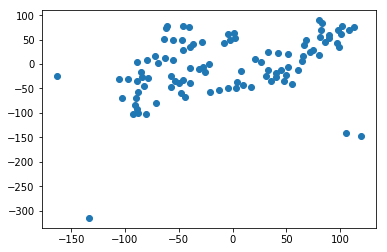

In [13]:
plt.scatter(embed_tsne[:,0],embed_tsne[:,1], label='True Position')  

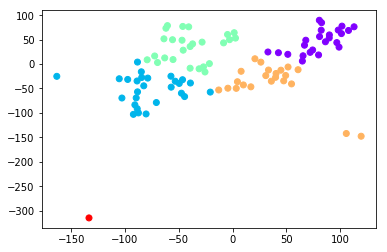

In [14]:
plt.scatter(embed_tsne[:,0],embed_tsne[:,1], c=clids, cmap='rainbow' )  

## Cluster com KMeans nas palavras mais comuns

In [11]:
arquivoEntrada = os.path.join('..','_corpus', "Petrobras-BoletinsTecnicos-Final.txt")
with open(arquivoEntrada, 'r', encoding="UTF-8") as f:
    texto = f.read()

In [17]:
from collections import Counter
word_counts = Counter(texto.split())

most_commom = word_counts.most_common(3000) # lista das palavras mais comuns do vocabulario

### Obtendo os vetores para as paalvras mais comuns
#2- Iterar enter as 1000 palavras mais comuns e pegar o vetor de cada uma usando: model.wv['computer']  # numpy vector of a word
# ou testar: say_vector = model['say']  # get vector for word
#3- empilhar os vetores apenas das palavras mais comuns do vocabulário, e rodar o TSNE

vocabulario = list()
vetores = list()


for word in most_commom:
    palavra = word[0]
    #print(palavra)
    vocabulario.append(palavra)
    vetores.append(word2vec.wv.word_vec(palavra));
matrix = np.vstack(vetores)    
    
print(matrix.shape)
tsne = TSNE(n_components=2, random_state=0, perplexity=5,early_exaggeration=10 )
embed_tsne = tsne.fit_transform(vetores)

(3000, 100)


In [18]:
#clusterizando com KMeans

from sklearn.cluster import KMeans  
import sklearn.cluster
kmeans  = KMeans(n_clusters=50, random_state=10)
clids = kmeans.fit_predict(embed_tsne)
#print(clids)

In [19]:
from bokeh.palettes import Viridis256
print(Viridis256)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Projeção tSNE para modelo Word2vec e clusterização KMeans para termos mais comuns",
           plot_width=800, 
           plot_height=600)

# Associando cada indice de cluster a uma cor, para exibicao no grafico
colors = [Viridis256[x*5] for x in clids]
#print(colors)

source = ColumnDataSource(data=dict(x1=embed_tsne[:,0],
                                    x2=embed_tsne[:,1],
                                    names=vocabulario,
                                    fill_color = colors))

p.scatter(x=embed_tsne[:,0], y=embed_tsne[:,1], size=8, fill_alpha=0.4, color = colors)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)

['#440154', '#440255', '#440357', '#450558', '#45065A', '#45085B', '#46095C', '#460B5E', '#460C5F', '#460E61', '#470F62', '#471163', '#471265', '#471466', '#471567', '#471669', '#47186A', '#48196B', '#481A6C', '#481C6E', '#481D6F', '#481E70', '#482071', '#482172', '#482273', '#482374', '#472575', '#472676', '#472777', '#472878', '#472A79', '#472B7A', '#472C7B', '#462D7C', '#462F7C', '#46307D', '#46317E', '#45327F', '#45347F', '#453580', '#453681', '#443781', '#443982', '#433A83', '#433B83', '#433C84', '#423D84', '#423E85', '#424085', '#414186', '#414286', '#404387', '#404487', '#3F4587', '#3F4788', '#3E4888', '#3E4989', '#3D4A89', '#3D4B89', '#3D4C89', '#3C4D8A', '#3C4E8A', '#3B508A', '#3B518A', '#3A528B', '#3A538B', '#39548B', '#39558B', '#38568B', '#38578C', '#37588C', '#37598C', '#365A8C', '#365B8C', '#355C8C', '#355D8C', '#345E8D', '#345F8D', '#33608D', '#33618D', '#32628D', '#32638D', '#31648D', '#31658D', '#31668D', '#30678D', '#30688D', '#2F698D', '#2F6A8D', '#2E6B8E', '#2E6C8E'